In [60]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from utilities import *
from visuals import *
from data_02_bargaining_games import bargainingGames

### 0. Load Payoffs from optimized policies

In [61]:
payoffs = load_data('../model/data/processed/50yr_all2.pickle')
payoffs.index.name = 'decisions'

In [62]:
graphs = []
actors = ["hydropower_revenue", "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation" , "environment", "flood_risk"]
baselines = ['Status Quo', 'Zero Baseline', 'No Baseline']

In [63]:
utility_function = get_marginal_utility_of_df
utility = 'diminishing'

In [64]:
games = []
all_outcomes = []

for index, value in enumerate(baselines):
    game = bargainingGames(payoffs, actors, value)
    game.set_parameters(utility_function)
    games.append(game)
    all_outcomes.append(game.preference_direction(actors))

Status Quo
Zero Baseline
No Baseline


In [65]:
if utility == 'linear':
    # linear utility transformation
    fair_policies = { 'policy7': 'egalitarian', 'policy98': 'utilitarian', 'baseline':'baseline', 'policy85':'fallback', 'policy92':'stable'}
else:
    # diminishing utility transformation
    fair_policies = {'policy87': 'egalitarian', 'policy85': 'utilitarian', 'baseline':'baseline'}

In [66]:
df = get_fallback_df(all_outcomes, baselines, utility_function, payoffs, actors, fair_policies)
df.to_csv(f'../output/processed/fallback_bargaining_{utility}.csv')

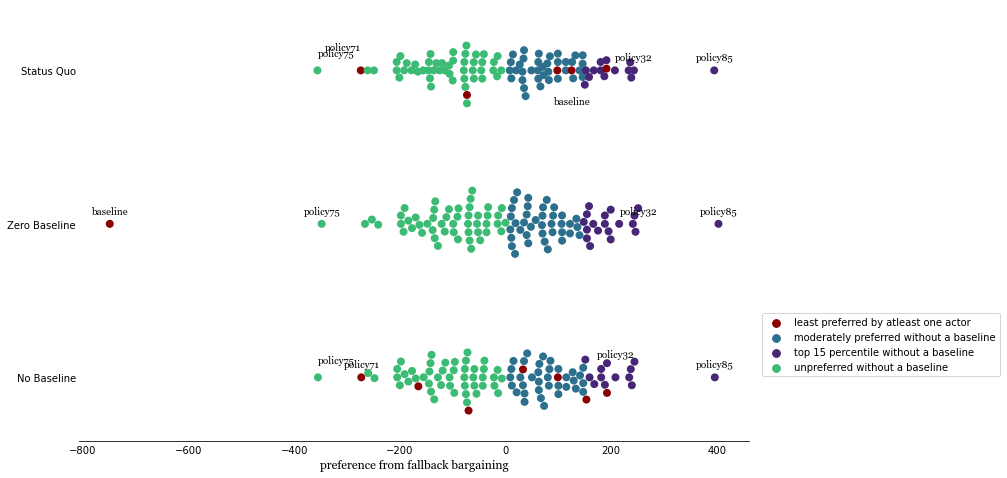

In [67]:
get_swarmplot(df, baselines, f'{utility}/08_fallback_swarm_{utility}')

In [68]:
selected_payoffs = utility_function(payoffs)[utility_function(payoffs).index.isin(['policy85', 'policy32', 'policy75', 'policy71'])]

In [69]:
utilities = utility_function(payoffs)
plot_selected_parcoords(selected_payoffs, utilities, f'/{utility}/11_fallback_policies_{utility}', ['#440154','#f2f2f2','#f2f2f2','#440154'])

In [70]:
payoffs = load_data('../model/data/processed/50yr_all2.pickle')
payoffs = add_baseline(payoffs, 'Status Quo')
utilities = utility_function(payoffs)


selected_payoffs = utilities[utilities.index.isin(['baseline']+list(fair_policies.keys()))]
selected_payoffs.rename(index = fair_policies, inplace = True)
selected_payoffs.rename(index = {'baseline':'status quo'}, inplace = True)
#selected_payoffs = (payoffs)[(payoffs).index.isin(['policy7',  'policy87', 'policy60'])]

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
plot_selected_parcoords(selected_payoffs, utilities, f'{utility}/10_baseline_tradeoffs_{utility}')

In [115]:
stable_policies = {'policy87': 'egalitarian', 'policy85': 'utilitarian', 'baseline': 'status quo', 'policy32':'fallback'}

{'policy87': 'egalitarian', 'policy85': 'utilitarian', 'baseline': 'baseline'}

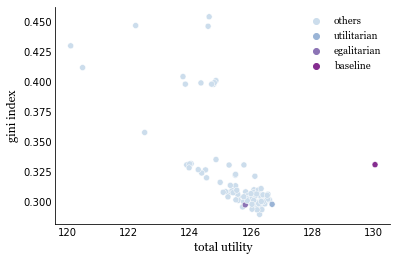

In [114]:
df = get_all_fairness_metrics(payoffs, utility_function).reset_index()
df['policies'] = df['decision'].map(fair_policies)
df['policies'] = df['policies'].fillna('others')
#df.rename(index = fair_policies, inplace = True)
#df.rename(index = {'baseline':'status quo'}, inplace = True)

ax = sns.scatterplot(data = df, x = 'utility', y = 'gini_index', hue = 'policies', palette = 'BuPu')

ax.set_ylabel('gini index', font = 'Georgia', fontsize = 12)
ax.set_xlabel('total utility', font = 'Georgia', fontsize = 12)

#axes lines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.axis('off')

#ticks
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.legend(frameon = False, loc = 'upper right', #bbox_to_anchor = (1, 0.1),
prop = 'Georgia', borderaxespad = 0.5)

plt.savefig(f'../visuals/{utility}/12_fairness_stable_policies_{utility}.png')
